# INICIALIZAÇÃO

### Importacao de bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Carregar a base e visualizar primeiras linhas
df1 = pd.read_csv('../mobile.csv')
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
#dimnesões da base
df1.shape

(2000, 21)

### Indicar a semente inicial e para divisão da base em treino e teste

In [4]:
np.random.seed(0) #semente inicial

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1.loc[:,df1.columns != 'price_range'], 
                                                    df1['price_range'], test_size=0.3, 
                                                    stratify=df1.price_range)

In [6]:
x_train.shape

(1400, 20)

In [7]:
# alguns dados estatisticos por atributo
x_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,1239.501429,0.490714,1.501571,0.517857,4.294286,0.509286,32.123571,0.500786,139.869286,4.540714,9.881429,650.657143,1251.384286,2130.767857,12.383571,5.885000,10.884286,0.750000,0.507857,0.505714
std,437.142296,0.500092,0.808964,0.499860,4.375410,0.500092,18.008370,0.286919,35.534931,2.305427,5.971239,446.334581,433.670599,1086.180824,4.242390,4.370157,5.462803,0.433167,0.500117,0.500146
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,258.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,854.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,285.750000,873.000000,1204.000000,9.000000,2.000000,6.000000,0.750000,0.000000,0.000000
50%,1226.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,140.500000,4.000000,10.000000,573.500000,1255.500000,2178.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1614.250000,1.000000,2.200000,1.000000,7.000000,1.000000,47.000000,0.700000,170.000000,7.000000,15.000000,951.000000,1626.250000,3066.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1920.000000,1995.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


## Análise exploratória

### Dispersão

#### Visualização RAM x INT_MEMORY (Internal Memory in Gigabytes) e cores comos as classes de saída (PRICE_RANGE)

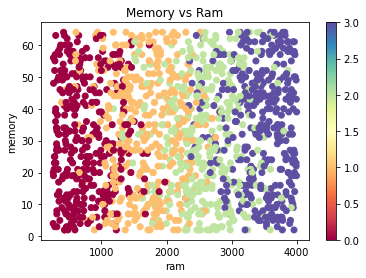

In [8]:
plt.scatter(x_train['ram'], x_train['int_memory'], c=y_train, cmap=plt.cm.Spectral);
plt.colorbar();
plt.xlabel('ram');
plt.ylabel('memory');
plt.title('Memory vs Ram');

#### Visualização PRICE_RANGE x BATTERY_POWER e cores comos as classes de saída (PRICE_RANGE)

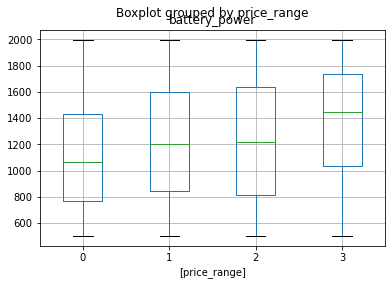

In [9]:
df1.boxplot(column=['battery_power'], by=['price_range']);

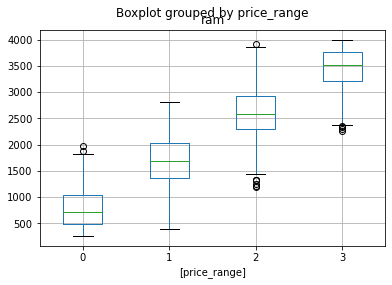

In [10]:
df1.boxplot(column = ['ram'], by= ['price_range']);

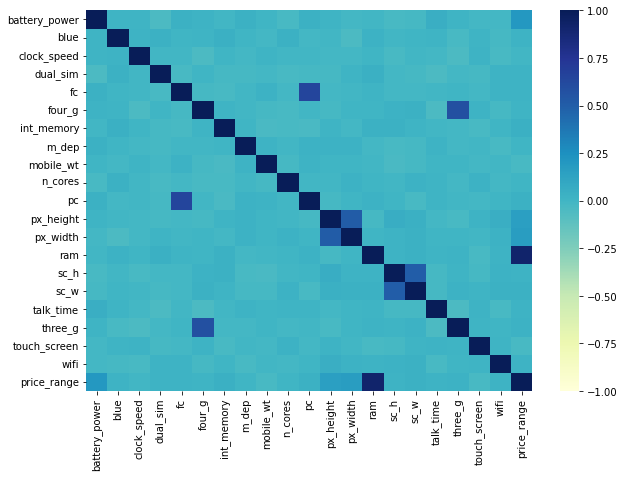

In [11]:
#análise de correlação
import seaborn as sns
plt.figure(figsize=(10,7))
corr = df1.corr()
sns.heatmap(corr,vmin=-1,vmax=1, yticklabels=True, cmap='YlGnBu',);
plt.savefig('corr.jpg')

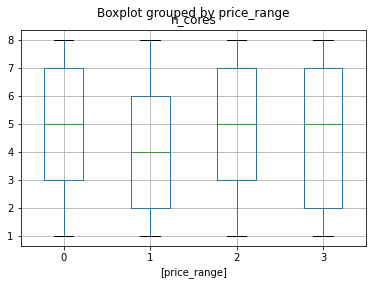

In [12]:
df1.boxplot(column = ['n_cores'], by= ['price_range']);

## **Normalizando os Dados**

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
X_train_normalized = scaler.transform(x_train)
X_test_normalized = scaler.transform(x_test)

In [14]:
X_train_normalized[0:2]

array([[ 1.67625125, -0.98159786, -0.3729206 ,  0.96490128, -0.98180974,
        -1.01874713,  0.27088355,  0.69457067, -1.06607265, -1.10245158,
        -1.48789929,  0.14420986,  0.91488203,  0.68082246,  0.8527554 ,
        -1.34711469,  1.1199196 , -1.73205081, -1.01583972, -1.01149463],
       [-0.57324799,  1.01874713, -0.99121623, -1.03637545,  1.99040205,
         0.98159786,  1.04857765, -0.35139449, -0.22153125, -0.66853755,
         0.85751056,  0.04335261, -1.03199099,  0.20098875, -0.56204716,
        -1.1182082 ,  1.6692845 ,  0.57735027, -1.01583972,  0.98863599]])

# Rede Neural

In [15]:
from keras import Sequential #É uma classe para criar uma rede neural, camada a camada
from keras.layers import Dense #cria uma camada densamente conectada
from tensorflow.keras.optimizers import SGD

In [16]:
NumberOfClasses = len(y_train.unique())
NumberOfClasses

4

In [17]:
X_train_normalized.shape[1:]

(20,)

In [18]:
RN = Sequential()
RN.add(Dense(10, input_shape = X_train_normalized.shape[1:], activation = 'sigmoid'))
RN.add(Dense(NumberOfClasses, activation = 'sigmoid'))
RN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 44        
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________


In [19]:
# treinamento
from tensorflow.keras.utils import to_categorical
sgd = SGD(learning_rate=0.1, decay=1e-6, momentum=0.9)
RN.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['accuracy'])
history = RN.fit(X_train_normalized, to_categorical(y_train), epochs = 100)

2022-03-09 22:02:23.226488: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
44/44 [==============================] - 1s 1ms/step - loss: 0.2047 - accuracy: 0.3014
Epoch 2/100
44/44 [==============================] - 0s 1ms/step - loss: 0.1841 - accuracy: 0.3650
Epoch 3/100
44/44 [==============================] - 0s 1ms/step - loss: 0.1781 - accuracy: 0.4086
Epoch 4/100
44/44 [==============================] - 0s 1ms/step - loss: 0.1694 - accuracy: 0.4729
Epoch 5/100
44/44 [==============================] - 0s 1ms/step - loss: 0.1576 - accuracy: 0.5179
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1449 - accuracy: 0.5807
Epoch 7/100
44/44 [==============================] - 0s 1ms/step - loss: 0.1346 - accuracy: 0.5821
Epoch 8/100
44/44 [==============================] - 0s 1ms/step - loss: 0.1274 - accuracy: 0.6486
Epoch 9/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1224 - accuracy: 0.6321
Epoch 10/100
44/44 [==============================] - 0s 1ms/step - loss: 0.1187 - accuracy: 0.7029
Epoch 11/

44/44 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9757
Epoch 84/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.9779
Epoch 85/100
44/44 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 0.9786
Epoch 86/100
44/44 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.9771
Epoch 87/100
44/44 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.9786
Epoch 88/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9800
Epoch 89/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 0.9771
Epoch 90/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9793
Epoch 91/100
44/44 [==============================] - 0s 1ms/step - loss: 0.0221 - accuracy: 0.9814
Epoch 92/100
44/44 [==============================] - 0s 1ms/step - loss: 0.0219 - accuracy: 0.9829
Epoch 93/100


In [20]:
score = RN.evaluate(X_test_normalized, to_categorical(y_test), verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.023277761414647102
Test accuracy: 0.9583333134651184


In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

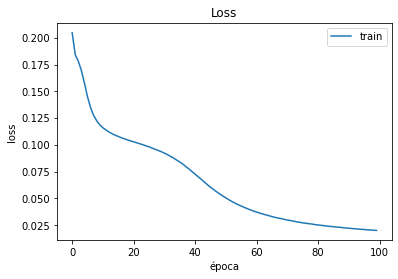

In [22]:
# Gráfico do treinamento: custo do treino e validação
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('época')
plt.legend();

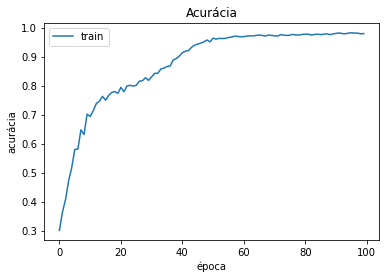

In [23]:
plt.plot(history.history['accuracy'], label='train')
plt.title('Acurácia')
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend();

In [24]:
# Previsão
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)
y_test_predicted_indexes = np.argmax(y_test_predicted,axis=1)
y_test_indexes = y_test.values

In [25]:
# Matriz de confusão
confMatrix = confusion_matrix(y_test_predicted_indexes, y_test_indexes)
pd.DataFrame(confMatrix, index=['Pred 0', 'Pred 1','Pred 2','Pred 3'], columns=['Real 0', 'Real 1', 'Real 2', 'Real 3'],) #matriz de confusão

,Real 0,Real 1,Real 2,Real 3
Pred 0,146,4,0,0
Pred 1,4,143,7,0
Pred 2,0,3,141,5
Pred 3,0,0,2,145


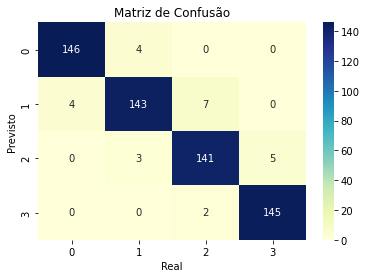

In [26]:
ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap='YlGnBu')
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Matriz de Confusão')

# Colocar os nomes
ax.xaxis.set_ticklabels(['0', '1','2','3']) 
ax.yaxis.set_ticklabels(['0', '1','2','3'])
plt.show()

## Retorne e rode novamente o modelo separando 20% do conjunto de treino para validação. Refaça os gráficos de loss e acurácia para incluir as métricas de validação também.
Dica: parâmetro validation_split da função fit().
